In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# read previously created csv file into datframe
df = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101270 entries, 0 to 101269
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      101270 non-null  int64  
 1   Customer ID     101270 non-null  object 
 2   Order_Id        101270 non-null  object 
 3   Order Date      101270 non-null  object 
 4   Price           101270 non-null  float64
 5   customer_state  101270 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


In [4]:
#drop unnamed column
df = df.drop('Unnamed: 0',axis=1)

In [5]:
# Columns contain no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101270 entries, 0 to 101269
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Customer ID     101270 non-null  object 
 1   Order_Id        101270 non-null  object 
 2   Order Date      101270 non-null  object 
 3   Price           101270 non-null  float64
 4   customer_state  101270 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.9+ MB


In [6]:
# Select the date for recency comparison 
reviewdate = pd.to_datetime(df['Order Date'].max())
print(reviewdate)

2018-09-03 00:00:00


In [7]:
# convert Order Date and create daysbetween column for recency calculation
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['daysbetween'] = reviewdate - df['Order Date']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101270 entries, 0 to 101269
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   Customer ID     101270 non-null  object         
 1   Order_Id        101270 non-null  object         
 2   Order Date      101270 non-null  datetime64[ns] 
 3   Price           101270 non-null  float64        
 4   customer_state  101270 non-null  object         
 5   daysbetween     101270 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), object(3), timedelta64[ns](1)
memory usage: 4.6+ MB


In [8]:
#Calculate Recency, Frequency and Monetary value for each customer 
df = df.groupby(['Customer ID']).agg({
    'daysbetween': 'count',
    'Order_Id': 'count',
    'Price': 'sum'})

# Rename the columns 
df.rename(columns={'daysbetween': 'Recency',
                         'Order_Id': 'Frequency',
                         'Price': 'MonetaryValue'}, inplace=True)
# Print top 5 rows
print(df.head())

                                  Recency  Frequency  MonetaryValue
Customer ID                                                        
0000366f3b9a7992bf8c76cfdf3221e2        1          1         129.90
0000b849f77a49e4a4ce2b2a4ca5be3f        1          1          18.90
0000f46a3911fa3c0805444483337064        1          1          69.00
0000f6ccb0745a6a4b88665a16c9f078        1          1          25.99
0004aac84e0df4da2b147fca70cf8255        1          1         180.00


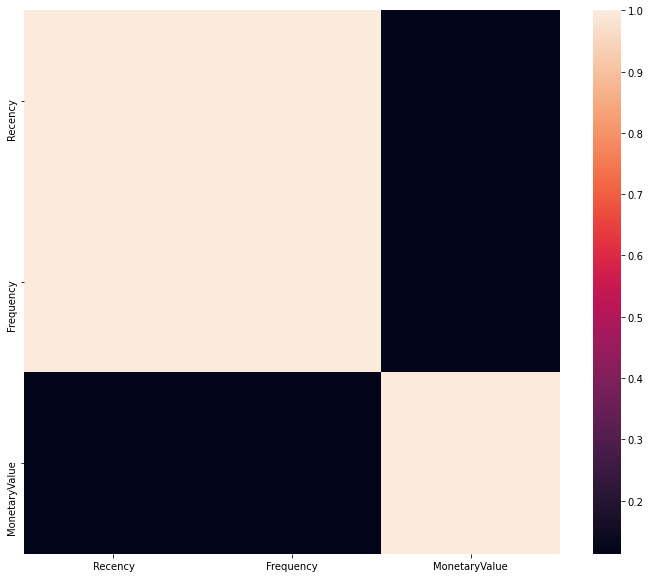

In [9]:
# Generate a heatmap from df
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

Based on the above generated heatmap, the customers from the website are buying frequently but not spending a large amount on a per customer basis.  I will attempt to predict if these trend continyues in the future, if so I will further attempt to address the cause.